In [1]:
#Importing the necessary/needed libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
print("Modules succesfully imported")

Modules succesfully imported


In [ ]:
#importing our dataset
data = pd.read_csv(r"C:/Users/chiso/Downloads/Thyroid_Diff.csv")
data

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [ ]:
#Examining our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
#Checking for nulls
data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [ ]:
# checking for duplicates
dup = data.duplicated().sum()
print(f"Duplicates are {dup}")

#Removing duplicates
data = data.drop_duplicates()
data

Duplicates are 19


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [ ]:
#Re-checking for duplicates
data.duplicated().sum()

0

In [ ]:
#encoding some features in the dataset
def encode(column, var1, var2):
    column = column.map({var1:1,var2:0})
    return (column)


list = ['Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Recurred']
for word in list:
    data[word] = encode(data[word], 'Yes', 'No')

data['Gender'] = encode(data['Gender'], 'F', 'M')


#dropping some features
data = data.drop(columns=['Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology','Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response',])
data

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Recurred
0,27,1,0,0,0,0
1,34,1,0,1,0,0
2,30,1,0,0,0,0
3,62,1,0,0,0,0
4,62,1,0,0,0,0
...,...,...,...,...,...,...
378,72,0,1,1,1,1
379,81,0,1,0,1,1
380,72,0,1,1,0,1
381,61,0,1,1,1,1


In [ ]:
#checking the column in our dataset
data.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Recurred'],
      dtype='object')

In [ ]:
#Reviewing breif information from our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              364 non-null    int64
 1   Gender           364 non-null    int64
 2   Smoking          364 non-null    int64
 3   Hx Smoking       364 non-null    int64
 4   Hx Radiothreapy  364 non-null    int64
 5   Recurred         364 non-null    int64
dtypes: int64(6)
memory usage: 19.9 KB


In [ ]:
#Splitting our dataset into training and testing data
X = data.drop(columns='Recurred', axis=1).values
y= data['Recurred'].values
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
train_X.shape #checking for the shape of our training features


(254, 5)

In [ ]:
test_X.shape #checking for the shape of our testing features

(110, 5)

In [ ]:
#Implementing the KNN model
KNN_model = KNeighborsClassifier(n_neighbors=8)
fit = KNN_model.fit(train_X, train_y)  #fitting our model into the training set
accuracy = KNN_model.score(test_X, test_y) #checkking for our model accuracyy
accuracy

0.7090909090909091

Optimizing our model

In optimizing the KNN classifier, It is important to optimize the number of neighbours or K-value (i.e optimal value for our n_neighbors) needed to attain the highest degree of peformance for our model.
Plotting the model complexity curve using different values of n_neighbors helps us obtain the optimal value

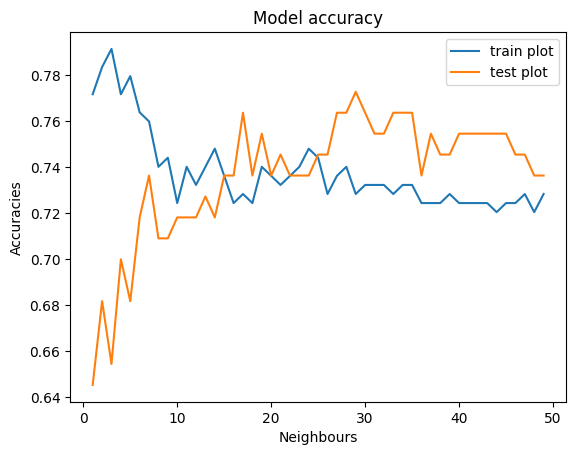

In [ ]:
#defining a function that loops through a range of different values and gets the optimal k-value
neighbours = np.arange(1, 50)
train_accuracy = {}
test_accuracy = {}

for neighbour in neighbours:
    model = KNeighborsClassifier(n_neighbors=neighbour)
    fit = model.fit(train_X, train_y)

    train_accuracy[neighbour]= model.score(train_X, train_y)
    test_accuracy[neighbour] = model.score(test_X, test_y)


#plotting the values
plt.plot(neighbours, train_accuracy.values(), label="train plot")
plt.plot(neighbours, test_accuracy.values(), label="test plot")
plt.legend()
plt.title("Model accuracy")
plt.xlabel("Neighbours")
plt.ylabel("Accuracies")
plt.show()



In [ ]:
#using the optimal k-value of 29 obtained to instantiate and train our KNN model
KNN_model = KNeighborsClassifier(n_neighbors=29)
fit = KNN_model.fit(train_X, train_y)
accuracy = KNN_model.score(test_X, test_y)
accuracy

0.7727272727272727